In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import matplotlib.pyplot as plt
import sys
import sklearn.datasets as datasets
from tqdm import tqdm
import torch
device = torch.device('cuda')
torch.set_default_tensor_type('torch.cuda.FloatTensor') if torch.cuda.is_available() else print ('cpu')
import torch.optim as optim
import torch.nn as nn
import torch.utils.data as utils


## Change the line below this to point to the directory where you have cloned the SINF package

sys.path.append("/home/sambt/SINF/")
sys.path.append("/home/sambt/SINF/sinf/")
from GIS import GIS

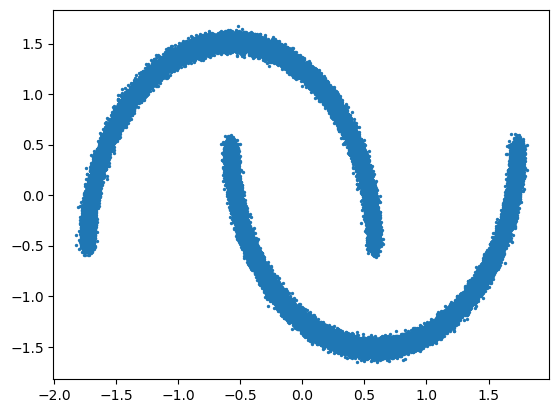

In [2]:
train,l1 = datasets.make_moons(100000,noise=0.02)
test,l2 = datasets.make_moons(100000,noise=0.02)

train = (train-train.mean(axis=0))/train.std(axis=0)
test = (test-test.mean(axis=0))/test.std(axis=0)

plt.scatter(train[:,0],train[:,1],s=2)

In [16]:
flow = GIS(torch.tensor(train,dtype=torch.float32,device=device), 
           torch.tensor(test,dtype=torch.float32,device=device), 
            Whiten=True, 
            batchsize=50000, 
            nocuda=False,
           M=100,
           edge_bins=20,
           iteration=1000,
            verbose=True)

After whiten logp: -2.7241017818450928 -2.7240548133850098
Fit A: Time: 0.04697087860107422 Wasserstein Distance: [0.3092727065086365, 0.2377742975950241]
Fit spline Time: 0.024422111511230468
logp: -2.587057590484619 -2.5868606567382812 time: 0.09462141990661621 iteration: 2 best: 2
Fit A: Time: 0.042014720916748044 Wasserstein Distance: [0.2869206964969635, 0.22867052257061005]
Fit spline Time: 0.02397161674499512
logp: -2.468421220779419 -2.4680655002593994 time: 0.08865880966186523 iteration: 3 best: 3
Fit A: Time: 0.03937177658081055 Wasserstein Distance: [0.2938413619995117, 0.17631565034389496]
Fit spline Time: 0.023142400741577147
logp: -2.3678510189056396 -2.3673744201660156 time: 0.08487200736999512 iteration: 4 best: 4
Fit A: Time: 0.03259699249267578 Wasserstein Distance: [0.2916216552257538, 0.13385319709777832]
Fit spline Time: 0.02292790412902832
logp: -2.257551670074463 -2.2570102214813232 time: 0.07793283462524414 iteration: 5 best: 5
Fit A: Time: 0.03287449645996094 W

In [14]:
with torch.no_grad():
    samples = flow.sample(100000)[0].detach().cpu().numpy()

(-2.0, 2.0)

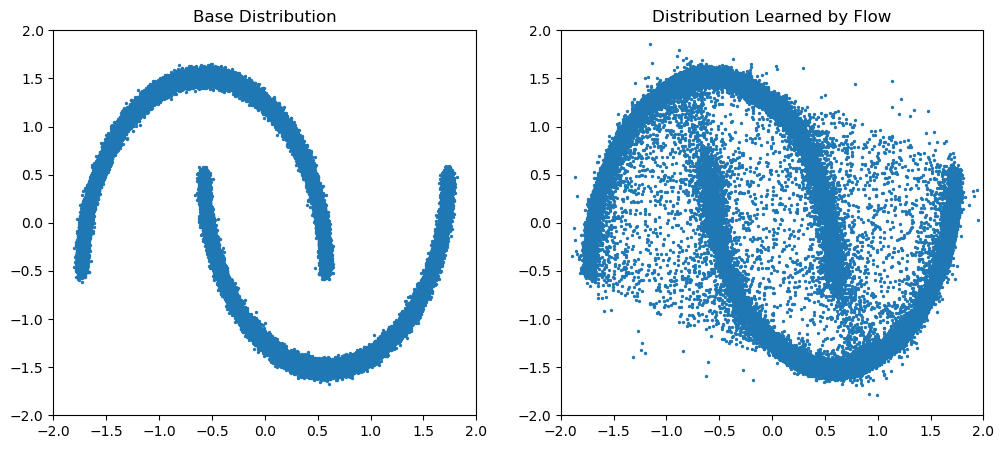

In [15]:
fig,axes = plt.subplots(1,2,figsize=(12,5))

plt.sca(axes[0])
plt.scatter(test[:,0],test[:,1],s=2)
plt.title("Base Distribution")
plt.xlim([-2,2])
plt.ylim([-2,2])

plt.sca(axes[1])
plt.scatter(samples[:,0],samples[:,1],s=2)
plt.title("Distribution Learned by Flow")
plt.xlim([-2,2])
plt.ylim([-2,2])